In [88]:
from glob import glob
from os.path import splitext

from numpy import *
import numpy as np
from numpy.random import rand
from scipy.stats import linregress

from matplotlib.pyplot import *
from matplotlib.cm import *
%matplotlib inline

In [89]:
data = {'0.1':[None],'-0.1':[None],
        '1.0':[None,None,None],'-1.0':[None,None,None],
        '0.2':[None,None,None,None,None,None],'-0.2':[None,None,None,None,None,None]}

plus100,minus100 = [],[]
plus200,minus200 = [],[]
plus1000,minus1000 = [],[]
allmV = []

for i,file_path in enumerate(glob('./md-electric-field-data/*/*/*q.out')):
    data = genfromtxt(file_path,dtype=float)
    
    x,y,z,w = data.T
    
    if i < 6 :
        y /= 0.2
        z /= 0.2
        w /= 0.2
        
        data = array([x,y,z,w]).T
        plus200 += [data]

    elif i < 12 :
        y /= 0.2
        z /= 0.2
        w /= 0.2

        data = array([x,y,z,w]).T
        minus200 += [data]
    elif i == 12 :
        y /= 0.1
        z /= 0.1
        w /= 0.1
        
        data = array([x,y,z,w]).T
        minus100 += [data]
    elif i == 13 :
        y /= 0.1
        z /= 0.1
        w /= 0.1

        data = array([x,y,z,w]).T
        plus100 += [data]
    elif i < 17 :
        plus1000 += [data]
    else :
        y /= 1.0
        z /= 1.0
        w /= 1.0

        minus1000 += [data]
        
    allmV += [data]
    
#     _,_,_,param,traj = file_path.split('/')
#     i = int(splitext(traj)[0][0])-1
    
#     if param[:param.index('-')] == 'plus': v = float(param[param.index('-')+1:-2])/1000
#     else : v = -float(param[param.index('-')+1:-2])/1000
  
    
#     data[str(v)][i] = frame,current,voltage,x


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


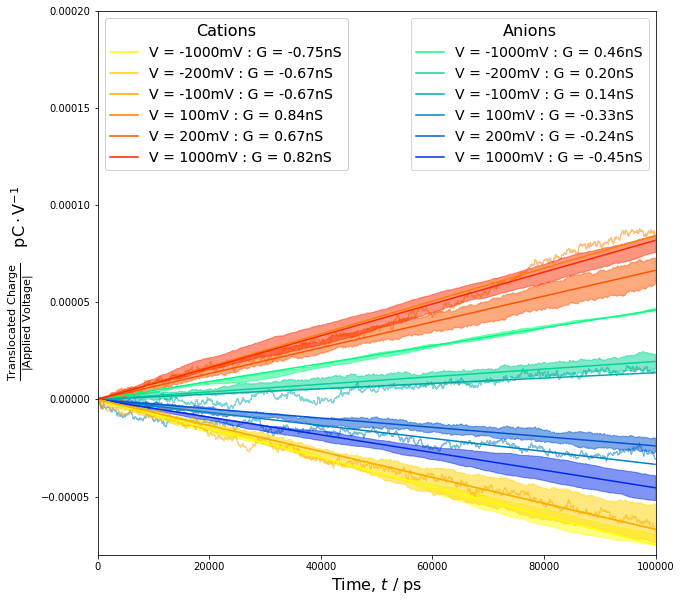

In [146]:
figure(figsize=(10,10))
label = [ '-1000mV','-200mV','-100mV','100mV','200mV','1000mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 6*[None]
pline  = 6*[None]

for j,datum in enumerate([minus1000,minus200,minus100,plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    slope, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
    slope = slope[0]
    
    nline[j], = plot(x,x*slope,color=winter(i),label='V = '+label[j]+' : G = {0:.2f}nS'.format(slope*1e9))

    #plot(x,y,color=winter(i))
    fill_between(x,y1=y+dy, y2=y-dy,alpha=0.5,color=winter(i))
    
for j,datum in enumerate([minus1000,minus200,minus100,plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    slope, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
    slope = slope[0]
    
    pline[j], = plot(x,x*slope,color=autumn(i),label='V = '+label[j]+' : G = {0:.2f}nS'.format(slope*1e9))

    #plot(x,y,color=winter(i))
    fill_between(x,y1=y+dy, y2=y-dy,alpha=0.5,color=autumn(i))

legend1 = legend(handles=nline,fontsize=14,loc=1)
legend1.set_title('Anions',prop={'size':16})
gca().add_artist(legend1)

legend2 = legend(handles=pline,fontsize=14,loc=2)
legend2.set_title('Cations',prop={'size':16})
gca().add_artist(legend2)

    
    
xlabel(r'Time, $t$ / $\mathrm{ps}$',fontsize=16)
ylabel(r'$\frac{\mathrm{Translocated\,\,Charge}}{|\mathrm{Applied\,\,Voltage}|}$   $\mathrm{pC\cdot V^{-1}}$',fontsize=16);
xlim(0,1e5); ylim(-8e-5,20e-5);

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


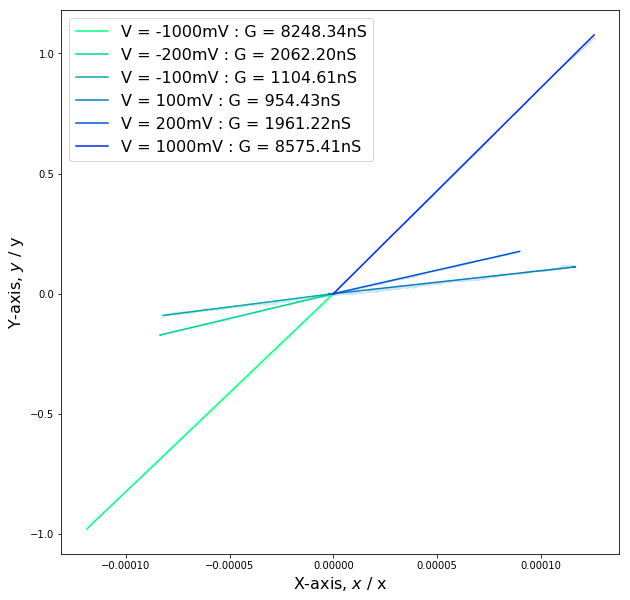

In [228]:
figure(figsize=(10,10))
label = [ '-1000mV','-200mV','-100mV','100mV','200mV','1000mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]


for j,datum in enumerate([minus1000,minus200,minus100,plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,y,z,w = mean(array(datum),axis=0).T
    _,dy,dz,dw = std(array(datum),axis=0).T
    
    z /= 0.000075
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    slope, _, _, _ = np.linalg.lstsq(y[:,np.newaxis], z)
    slope = slope[0]
    
    plot(y,slope*y,color=winter(i),label='V = '+label[j]+' : G = {0:.2f}nS'.format(slope))
    fill_between(y,y1=z+dz, y2=z-dz,alpha=0.2,color=winter(i))
    
xlabel(r'X-axis, $x$ / $\mathrm{x}$',fontsize=16)
ylabel(r'Y-axis, $y$ / $\mathrm{y}$',fontsize=16);
legend(fontsize=16);

In [230]:
1/1104.61

0.0009052968921157695